# Examples for control design 

# Initialization

In [1]:
#*** Load modules
# %matplotlib widget #For interactive plots
from control import * #Load Python Control Systems Library
import numpy as np #Numerical Python Library
import matplotlib.pyplot as plt #Plotting library

In [2]:
plt.close('all') #Close all open figures
s=tf([1,0],[1]) #Define Laplace - 's' variable 

# First order system

## Create the plant model
![RC Low-pass filter](https://www.electronics-tutorials.ws/wp-content/uploads/2013/08/fil5.gif?fit=326%2C161 "RC low-pass filter")

In [3]:
#First order plant model (τ) - Say RC filter
R = 1e5 ; #[ohms]
C = 1e-6; #[F]
tau = R*C ; #[seconds]
plant = 1/((tau*s+1))
plant


    1
---------
0.1 s + 1

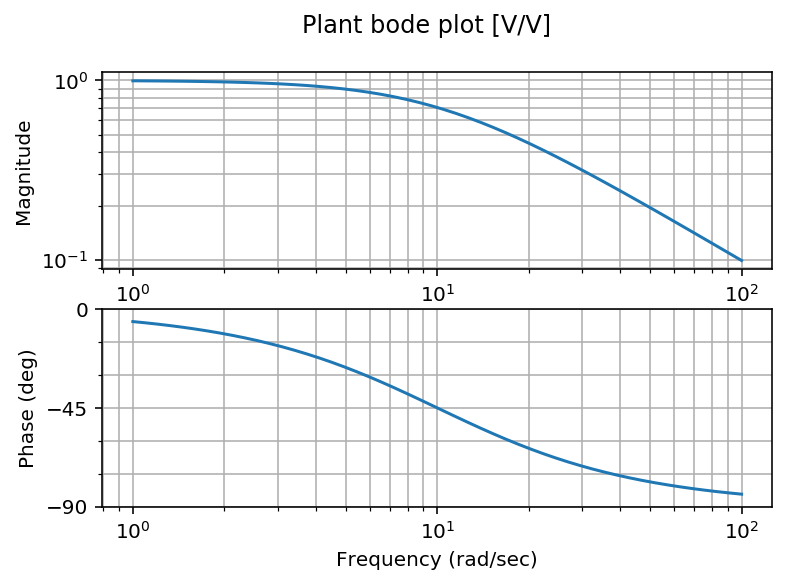

In [4]:
#Bode plot
plt.close(1)
plt.figure(1)
bode_plot(plant);
plt.suptitle('Plant bode plot [V/V]');

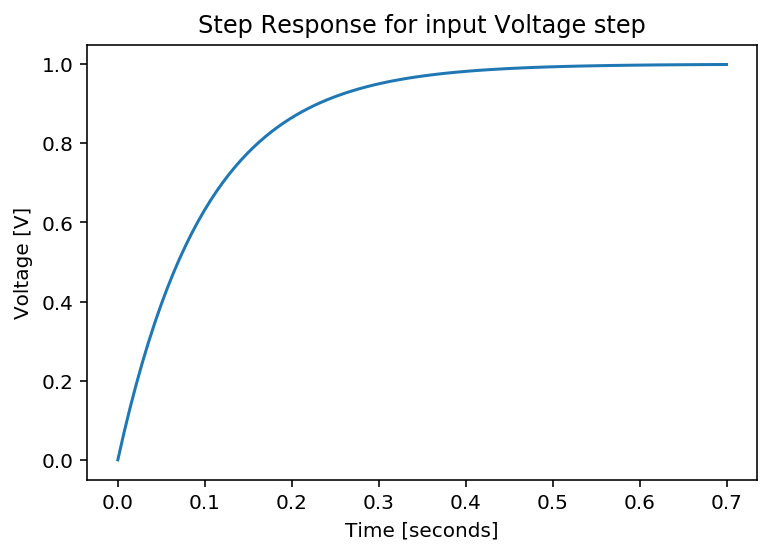

In [5]:
#Step response
plt.close(2)
plt.figure(2)
t,y = step_response(plant)
plt.plot(t,y)
plt.title('Step Response for input Voltage step')
plt.xlabel('Time [seconds]')
plt.ylabel('Voltage [V]');

## Controller Design - Basic, Proportional only

Only one parameter to set, $\omega_c$. Based on that, we get some phase margin.

If $\omega_c = 50 \; rad/s$ and $\tau = 0.1 s$. Then by implementing closed loop controller with pure Kp, we are making the response approximately 5 times faster. 

In [6]:
ω_c = 50; #[rad/s] Set cross-over frequency - 
Kp = 1/abs(evalfr(plant,1j*ω_c));
ctrl = Kp
print("Kp = {:.2f}".format(Kp))

Kp = 5.10


In [7]:
RR = ctrl*plant;
CL = feedback(RR,1);

In [8]:
print(RR)
print(CL)


  5.099
---------
0.1 s + 1


    5.099
-------------
0.1 s + 6.099



/Users/brij/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/brij/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


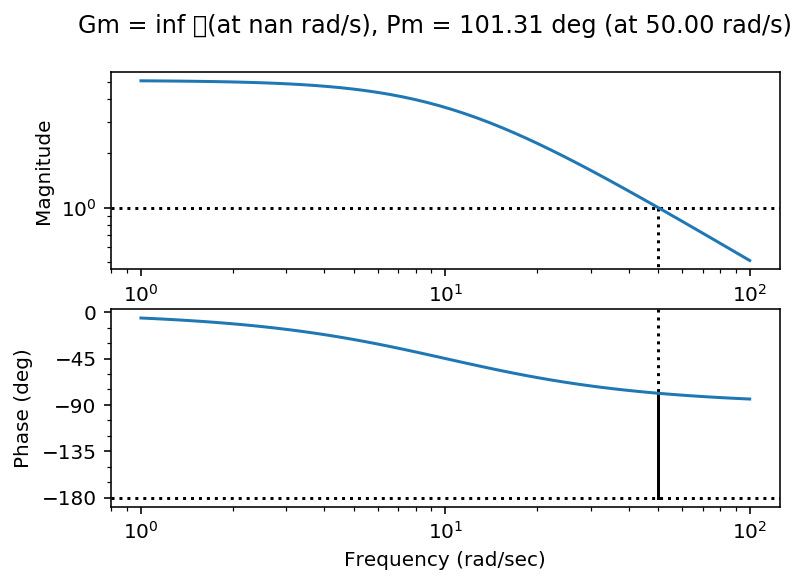

In [9]:
#Return Ratio Bode plot
plt.close(5)
plt.figure(5)
bode_plot(RR,margins=True);

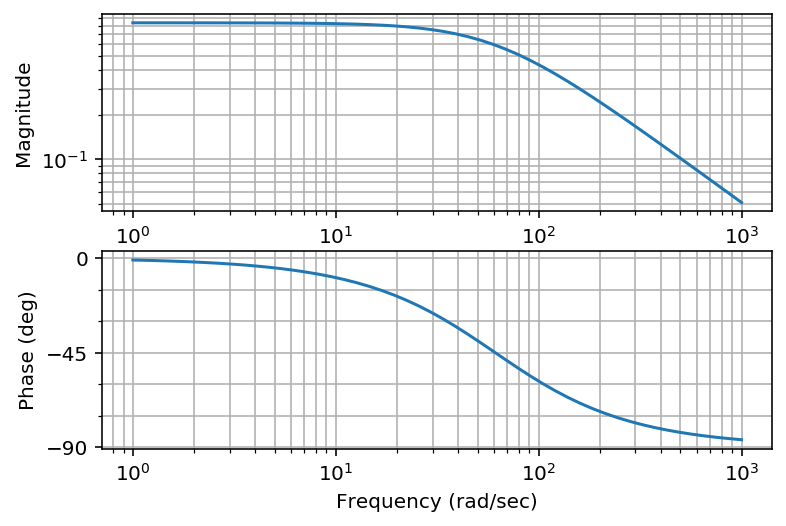

In [10]:
#Closed loop Bode plot
plt.close(3)
plt.figure(3)
bode_plot(CL);

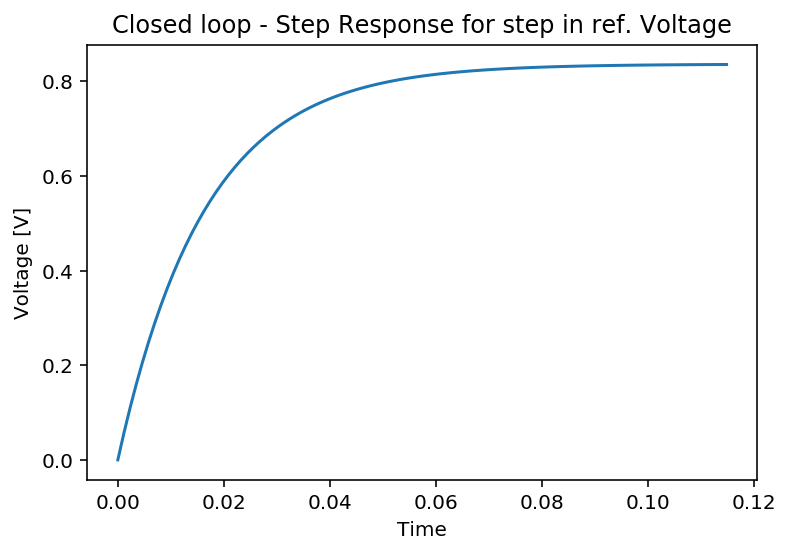

In [11]:
#Closed loop Step response (#Non-zero steady state error!)
plt.close(4)
plt.figure(4)
t,y = step_response(CL)
plt.plot(t,y)
plt.title('Closed loop - Step Response for step in ref. Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage [V]');

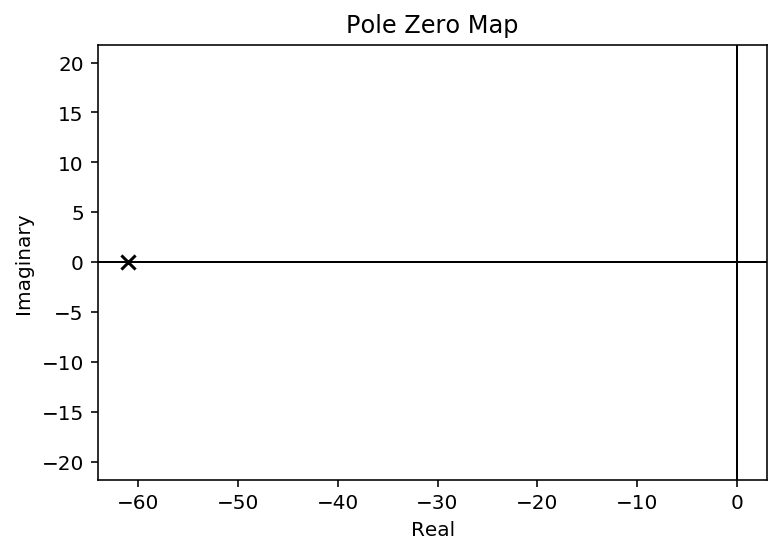

In [12]:
plt.close(6)
pzmap(CL);

In [13]:
#find poles, zeros, damping
damp(CL, doprint=True);
zero(CL)

_____Eigenvalue______ Damping___ Frequency_
    -60.99                     1      60.99


array([], dtype=float64)

## Controller Design - PI

In [14]:
ω_c = 50; #[rad/s] Target crossover frequency
Ki = ω_c/10; #[rad/s] Zero for the lag term
ctrl = (1+Ki/s);

Kp = 1/abs(evalfr(plant*ctrl,ω_c*1j))
# ctl.bode(sys_d*ctrl_d)
ctrl = Kp*ctrl

# LPF = 1/((1/1000.)*s+1);
LPF = 1;

RR = ctrl*plant*LPF;

print("Kp: {:10.2f}".format(Kp))
print("Ki: {:.2f}".format(Ki))

Kp:       5.07
Ki: 5.00


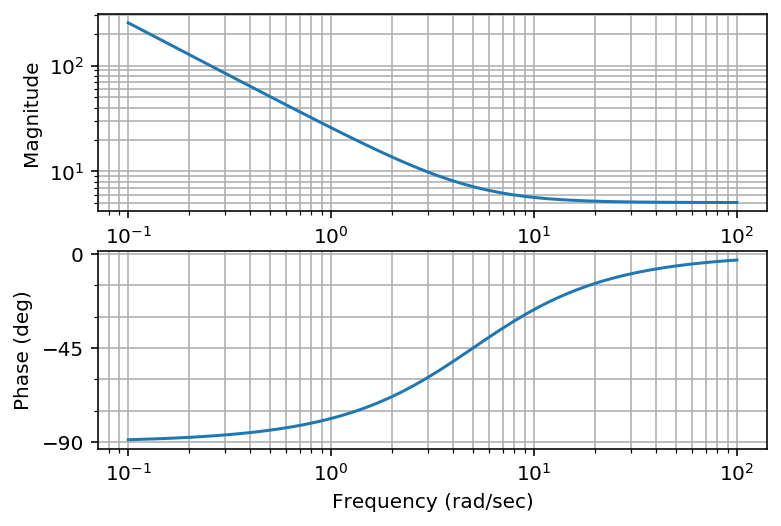

In [15]:
#Controller Bode plot
plt.close(15)
plt.figure(15)
bode_plot(ctrl);

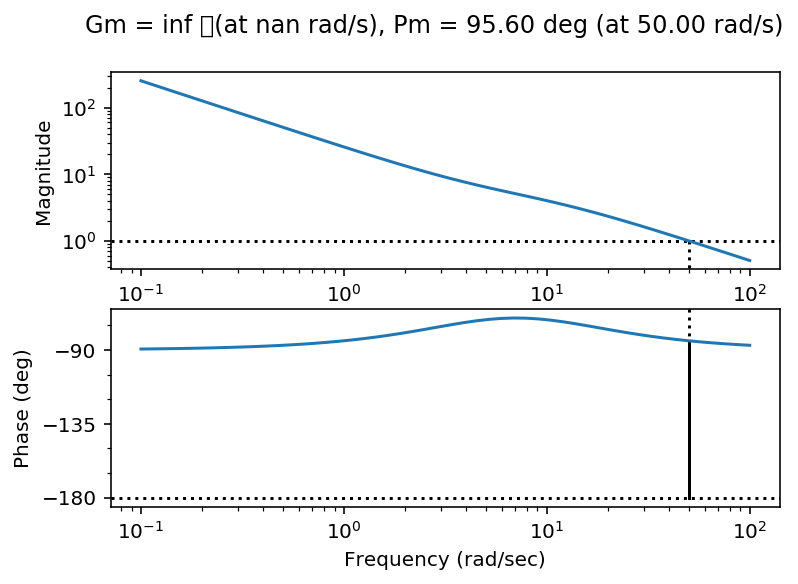

In [16]:
plt.close(11)
plt.figure(11)
bode_plot(RR,margins=True);

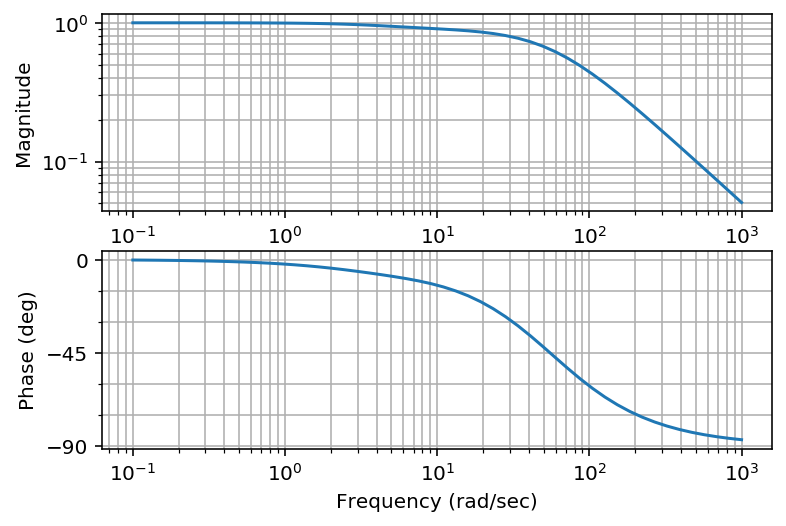

In [17]:
#Closed Loop
CL = feedback(RR,1)

plt.close(13)
plt.figure(13)
bode_plot(CL);

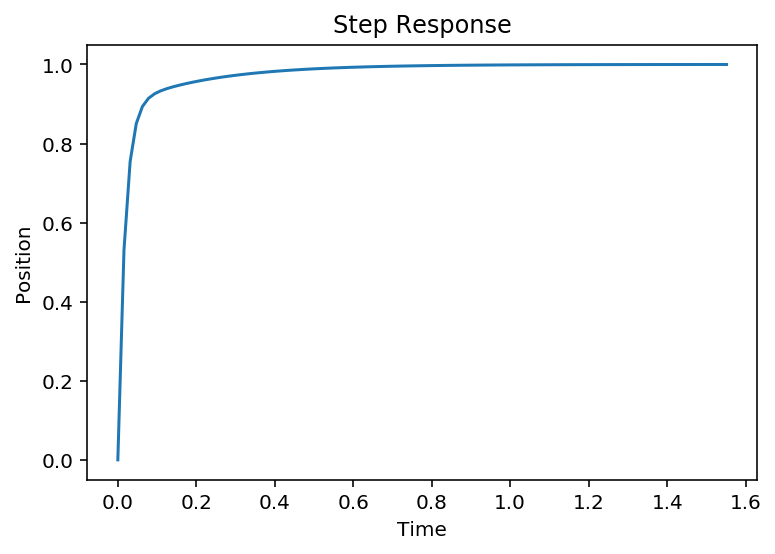

In [18]:
#Plot CL step response
plt.close(14)
plt.figure(14)
t,y = step_response(CL)
plt.plot(t,y)
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Position');

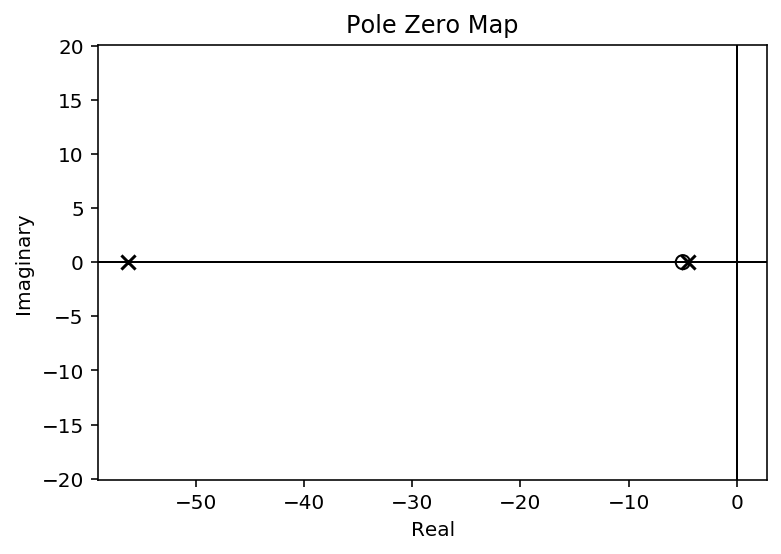

In [19]:
#Plot closed loop poles and zeros
pzmap(CL);

In [20]:
#poles and zeros
damp(CL)
zero(CL)

_____Eigenvalue______ Damping___ Frequency_
    -56.23                     1      56.23
    -4.512                     1      4.512


array([-5.])

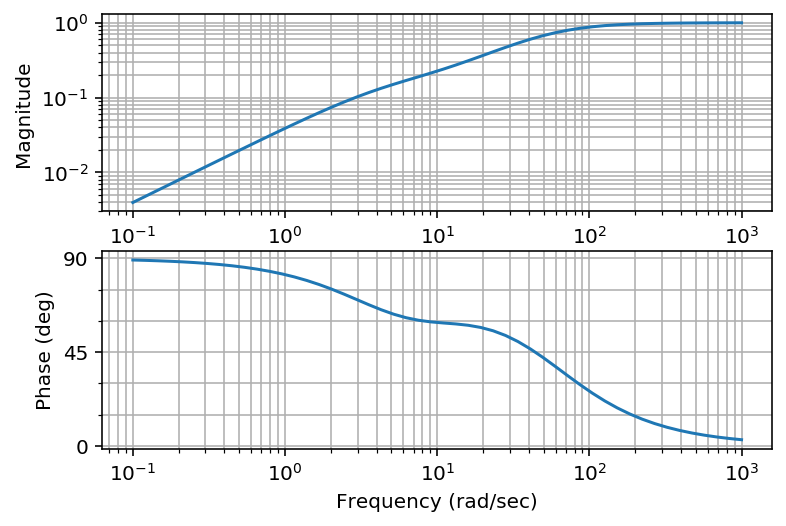

In [21]:
#Sensitivity
S = feedback(1,RR);
plt.close(15)
plt.figure(15)
bode_plot(S);

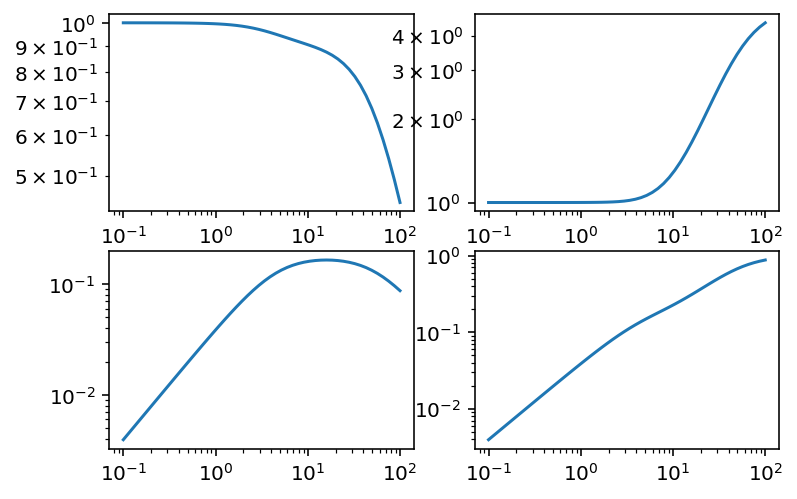

In [22]:
#Plot sensitivities
plt.close(12)
plt.figure(12)
gangof4_plot(ctrl,plant)

## Controller design - PID

In [23]:
ω_c = 1000; #[rad/s] Target crossover frequency

#lead controller
alpha = 10
tau = 1/(np.sqrt(alpha)*ω_c)
lead = (alpha*tau*s+1)/(tau*s+1)

Ki = 0.1*ω_c; #[rad/s] Zero for the lag term
lag = (1+Ki/s);

ctrl = lead*lag;

Kp = 1/abs(evalfr(plant*ctrl,ω_c*1j))
# ctl.bode(sys_d*ctrl_d)
ctrl = Kp*ctrl

# LPF = 1/((1/1000.)*s+1);
LPF = 1; #To be added at the end

RR = ctrl*plant*LPF;

print("Kp: {:10.2f}".format(Kp))
print("Ki: {:.2f}".format(Ki))

Kp:      31.47
Ki: 100.00


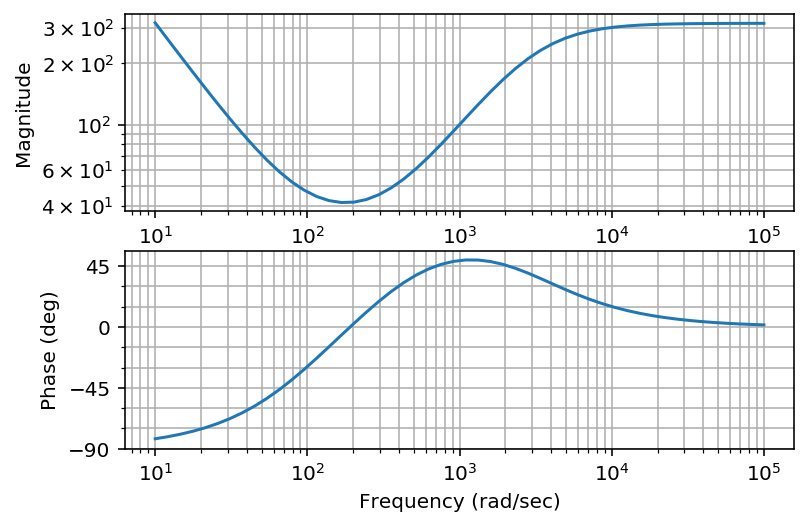

In [24]:
#Controller Bode plot
plt.close(20)
plt.figure(20)
bode_plot(ctrl);

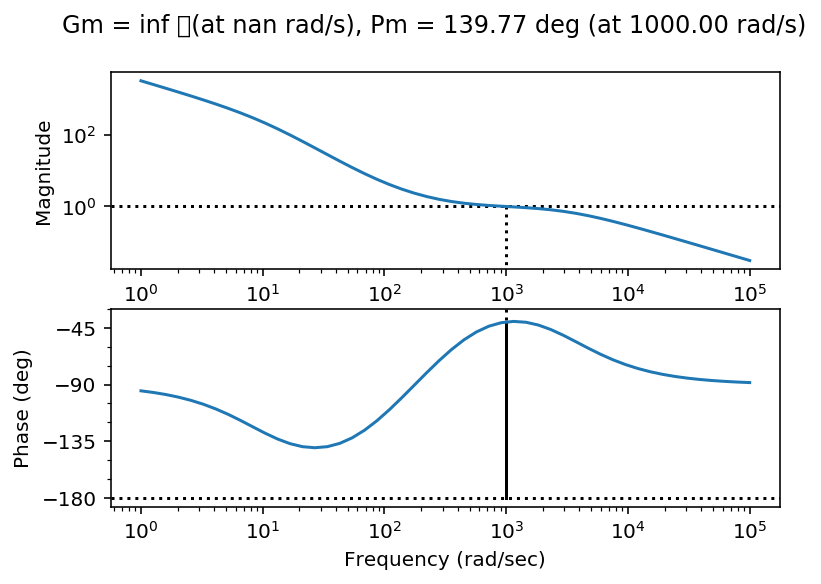

In [25]:
plt.close(21)
plt.figure(21)
bode_plot(RR,margins=True);

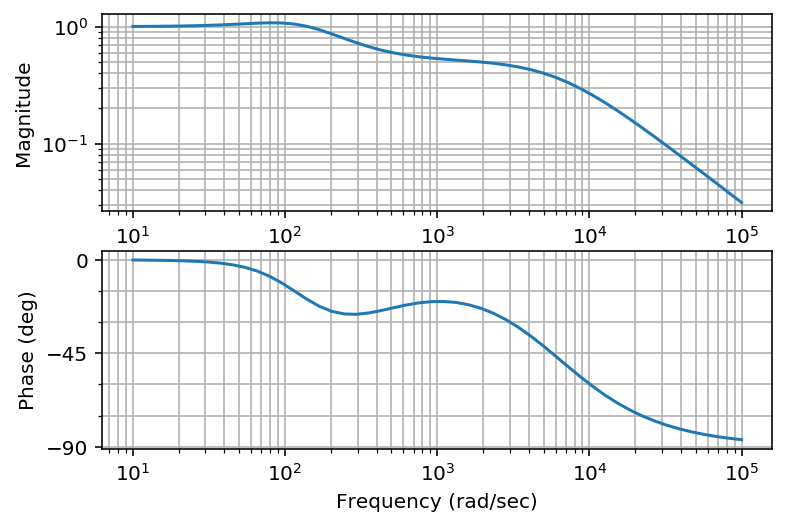

In [26]:
#Closed Loop
CL = feedback(RR,1)

plt.close(22)
plt.figure(22)
bode_plot(CL);

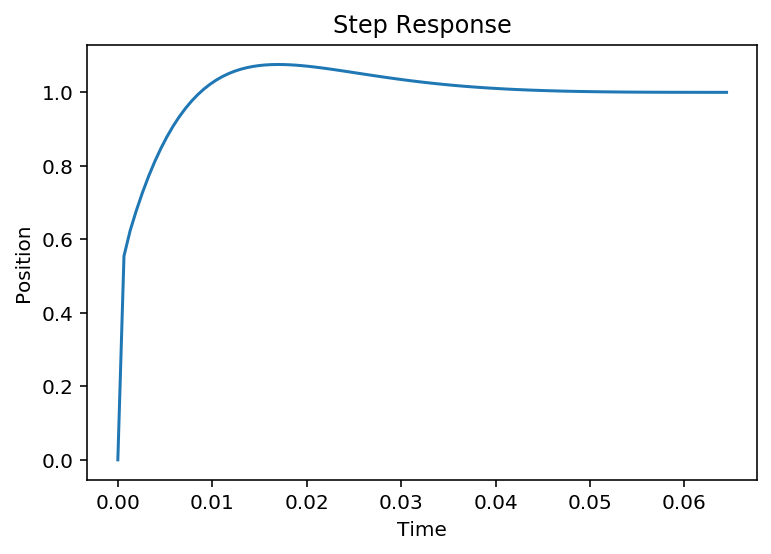

In [27]:
#Plot CL step response
plt.close(23)
plt.figure(23)
t,y = step_response(CL)
plt.plot(t,y)
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Position');

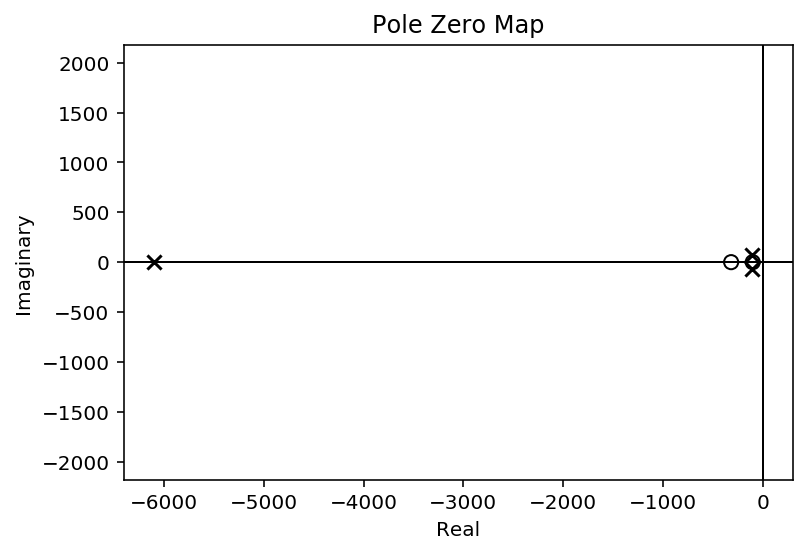

In [28]:
#Plot closed loop poles and zeros
pzmap(CL);

In [29]:
#poles and zeros
damp(CL)
zero(CL)

_____Eigenvalue______ Damping___ Frequency_
     -6102                     1       6102
    -108.6    +67.22j     0.8503      127.7
    -108.6    -67.22j     0.8503      127.7


array([-316.22776602, -100.        ])

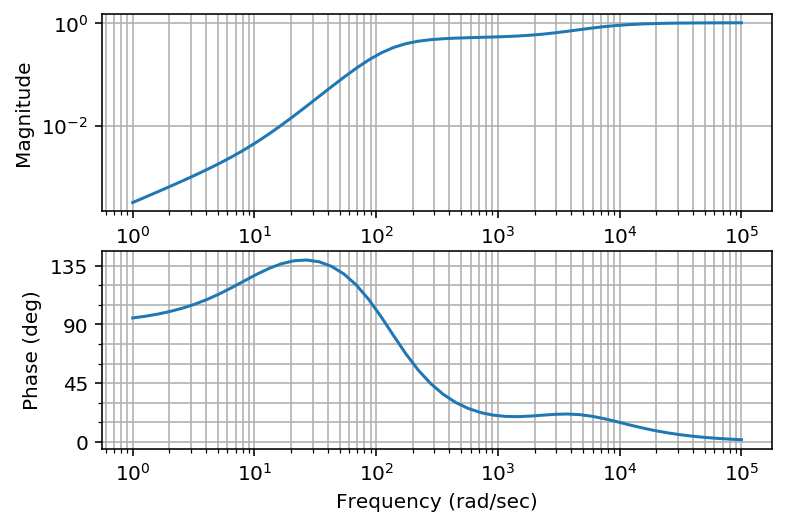

In [30]:
#Sensitivity
S = feedback(1,RR);
plt.close(25)
plt.figure(25)
bode_plot(S);

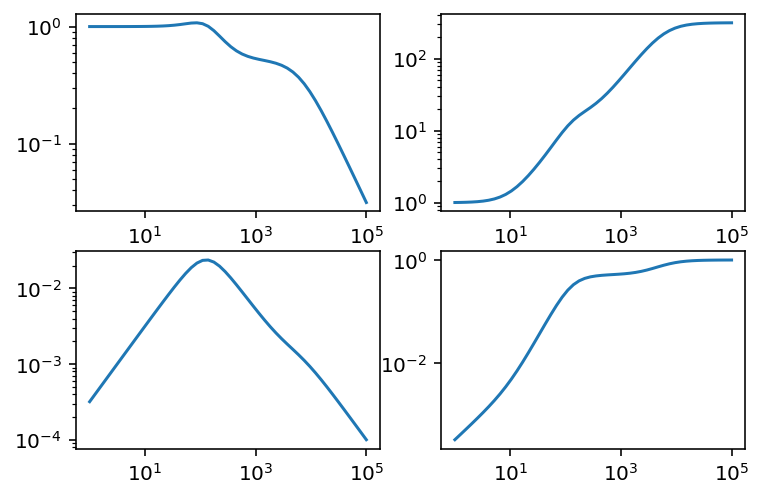

In [31]:
#Plot sensitivities
plt.close(24)
plt.figure(24)
gangof4_plot(ctrl,plant)

# Pure Mass controller design!

In [32]:
t = np.arange(0,7/ω_c,0.0001)

In [33]:
m= 10; #[kg] 
plant = 1/(m*(s**2)); 
plant


  1
------
10 s^2

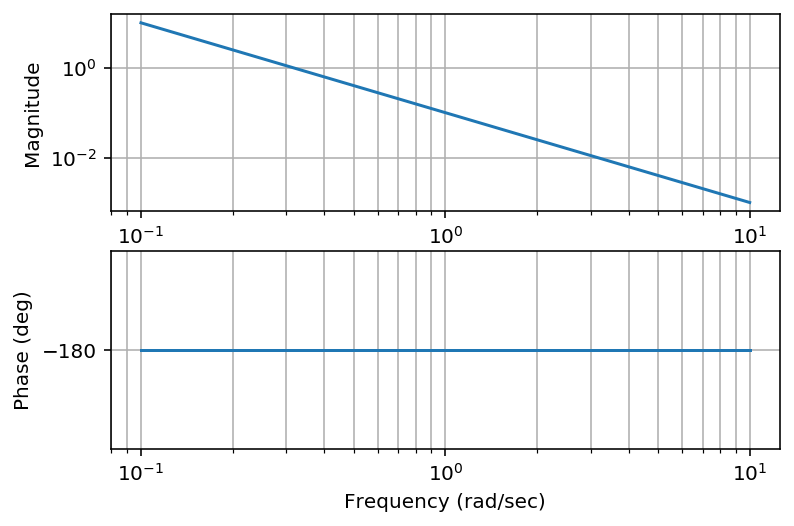

In [34]:
bode_plot(plant);

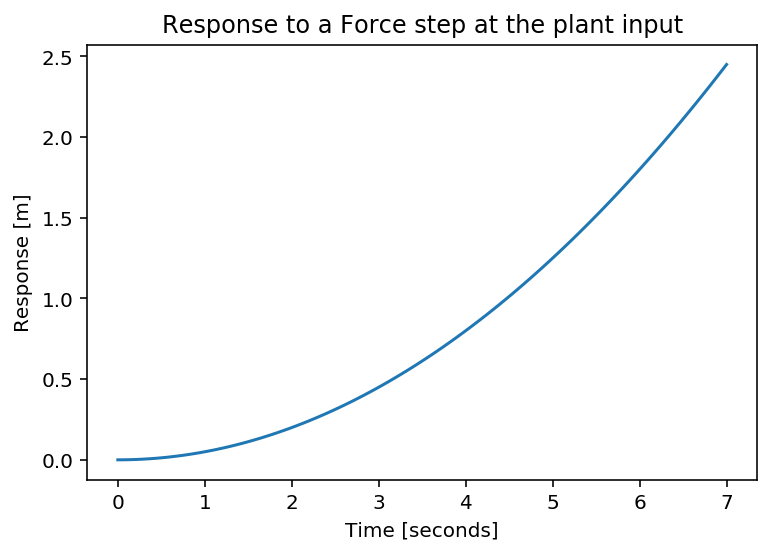

In [35]:
t,y = step_response(plant)
plt.plot(t,y)
plt.title('Response to a Force step at the plant input')
plt.ylabel('Response [m]')
plt.xlabel('Time [seconds]');

In [36]:
w_c = 1000; #crossover frequency of 1000 rad/s
phi_m = 45 ; #[deg] required phase margin 

alpha = (1+np.sin(np.deg2rad(phi_m)))/(1-np.sin(np.deg2rad(phi_m))) #Based on phase boost required as plant phase is at -180 degrees
tau = 1/(np.sqrt(alpha)*w_c);
C_lead = (alpha*tau*s+1)/(tau*s+1);

In [37]:
alpha, tau

(5.828427124746189, 0.00041421356237309506)

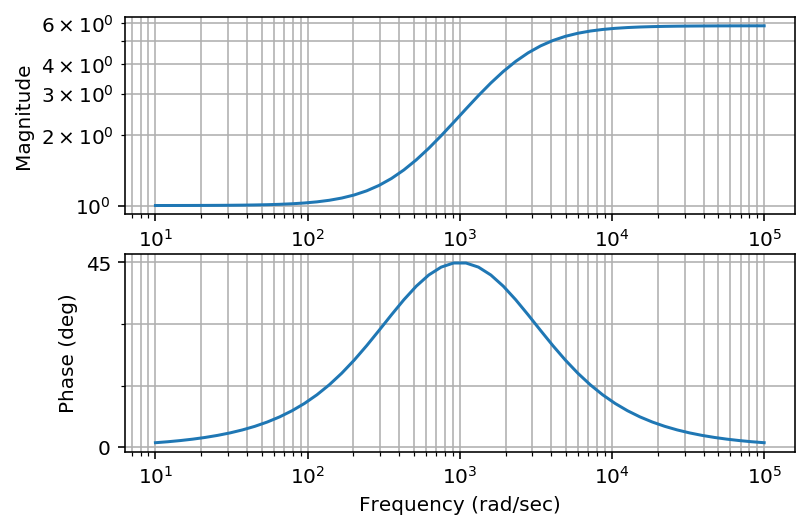

In [38]:
bode_plot(C_lead);

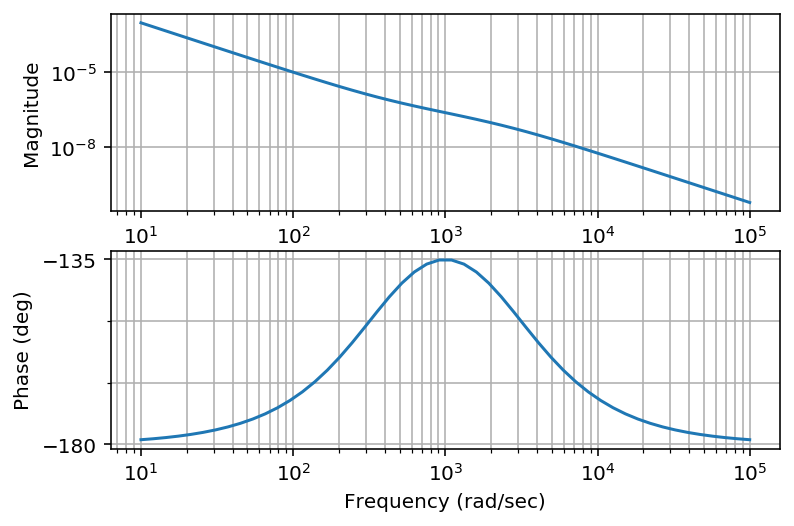

In [39]:
RR = C_lead*plant
bode_plot(RR);

In [40]:
Kp = 1/abs(evalfr(RR,1j*w_c))
print(Kp)

4142135.6237309505


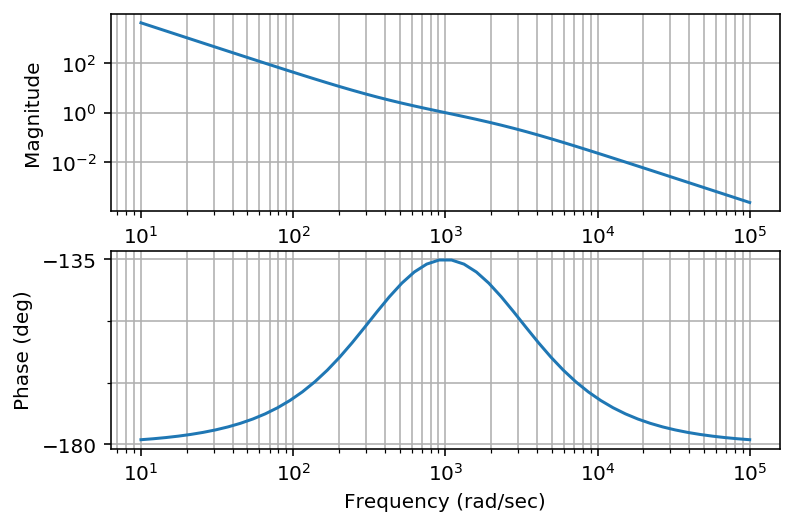

In [41]:
RR = Kp*RR
bode_plot(RR);

In [42]:
 CL = feedback(RR,1)
CL


            1e+04 s + 4.142e+06
-------------------------------------------
0.004142 s^3 + 10 s^2 + 1e+04 s + 4.142e+06

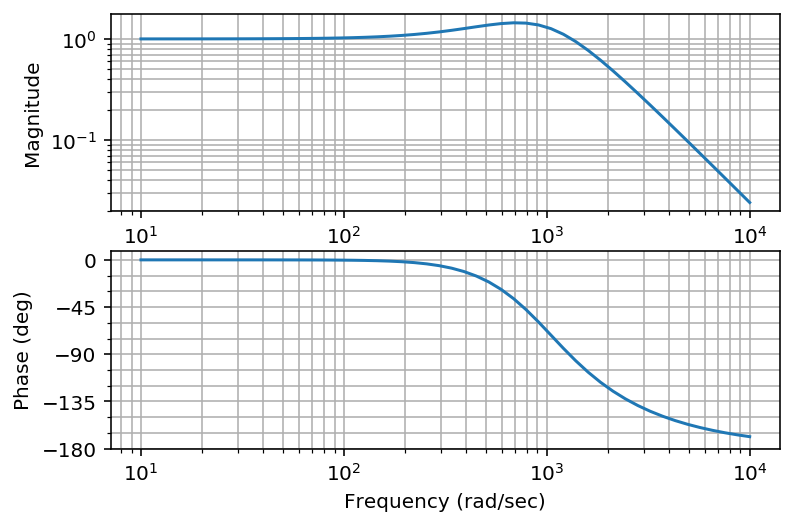

In [43]:
bode_plot(CL);

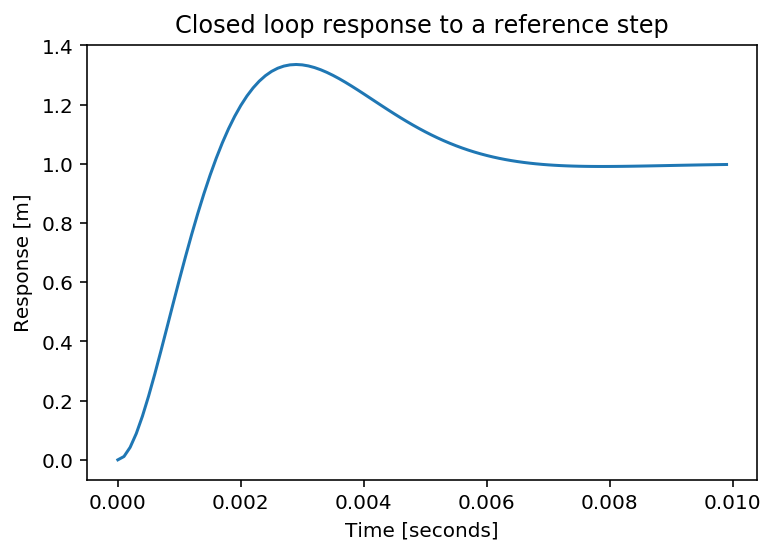

In [44]:
t,y = step_response(CL);
plt.plot(t,y)
plt.title('Closed loop response to a reference step')
plt.ylabel('Response [m]')
plt.xlabel('Time [seconds]');

# Spring-mass-damper system

In [45]:
m = 0.1 ; #[kg]
k = 100000 ; #[N/m]
b = 1 ; #[kg.s/m]

In [46]:
plant = 1/(m*(s**2) + b*s +k)
plant


         1
-------------------
0.1 s^2 + s + 1e+05

In [47]:
ω_n = np.sqrt(k/m) #[rad/s] Natural frequency
ζ = b/(2*np.sqrt(k*m))
print('ω_n: {:.2f} Hz'.format((ω_n/(2*np.pi))))
print('ζ: {:.4f}'.format(ζ))

ω_n: 159.15 Hz
ζ: 0.0050


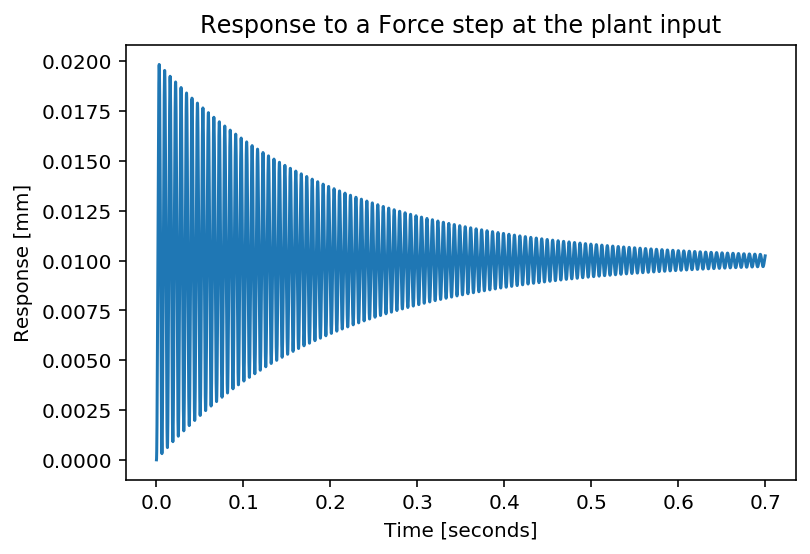

In [48]:
t = np.arange(0,700/ω_n,0.0001)
t,y = step_response(plant,t);
plt.plot(t,y*1e3)
plt.title('Response to a Force step at the plant input')
plt.ylabel('Response [mm]')
plt.xlabel('Time [seconds]');

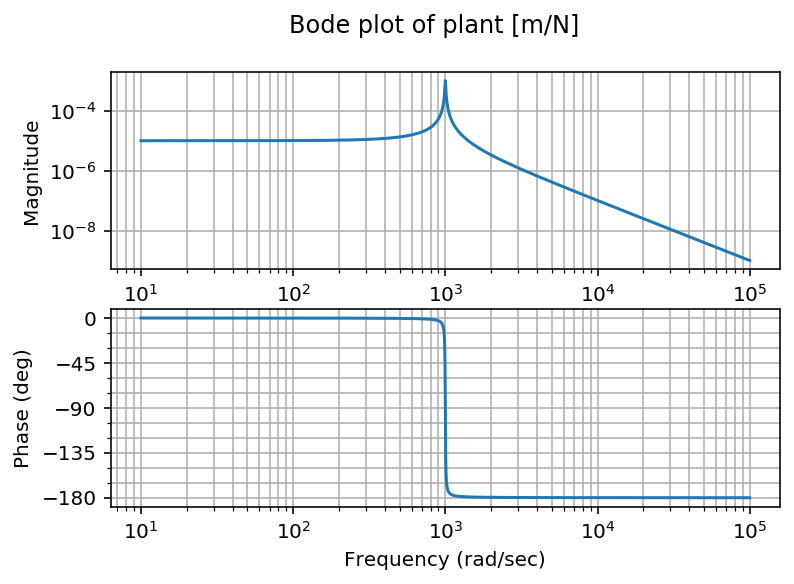

In [49]:
bode_plot(plant,omega=np.arange(0.01*ω_n,100*ω_n,1));
plt.suptitle('Bode plot of plant [m/N]');

(array([-5.+999.98749992j, -5.-999.98749992j]), array([], dtype=float64))

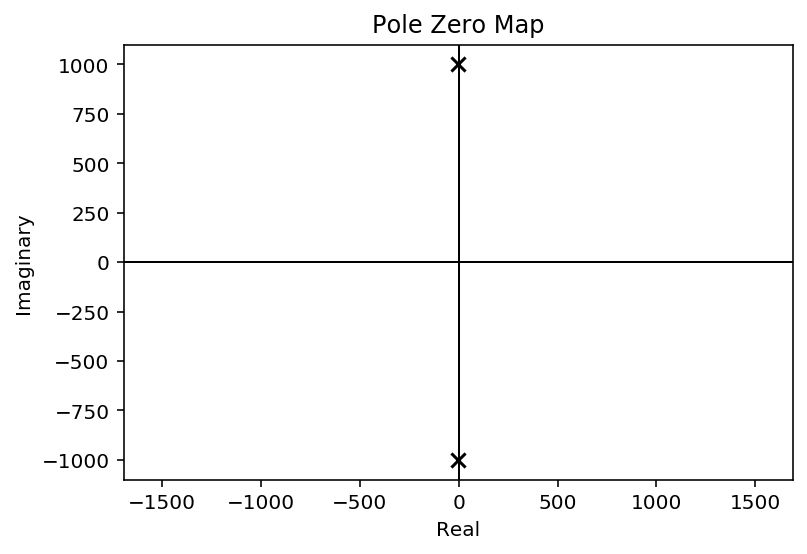

In [50]:
pzmap(plant)

In [51]:
damp(plant); #get damping and natural frequency

_____Eigenvalue______ Damping___ Frequency_
        -5     +1000j      0.005       1000
        -5     -1000j      0.005       1000


In [52]:
Q = 1/(2*ζ)
print('Quality Factor: {:.2f}'.format(Q))

Quality Factor: 100.00


**What crossover frequencies are possible?**<br>
Select a crossover frequency atleast Q times below the natural frequency

In [53]:
ω_c = ω_n/Q;
print("ω_c: {:.2f} rad/s".format(ω_c))

ω_c: 10.00 rad/s


In [54]:
# Since phase of plant is 0 deg, a simple PI controller would work.
# We need to reduce the magnitude beyond the crossover so put additional low-pass filters
# Use controller of the type Ki/s
ctrl = 1/s
RR = ctrl*plant
Ki = 1/abs(evalfr(RR,1j*ω_c))

In [55]:
ctrl=Ki/s
ctrl


9.999e+05
---------
    s

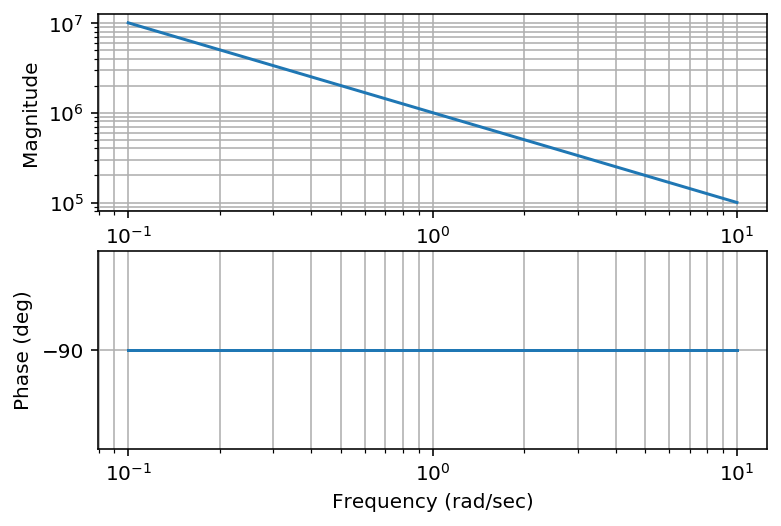

In [56]:
bode_plot(ctrl);

In [57]:
RR = ctrl*plant
RR


       9.999e+05
-----------------------
0.1 s^3 + s^2 + 1e+05 s

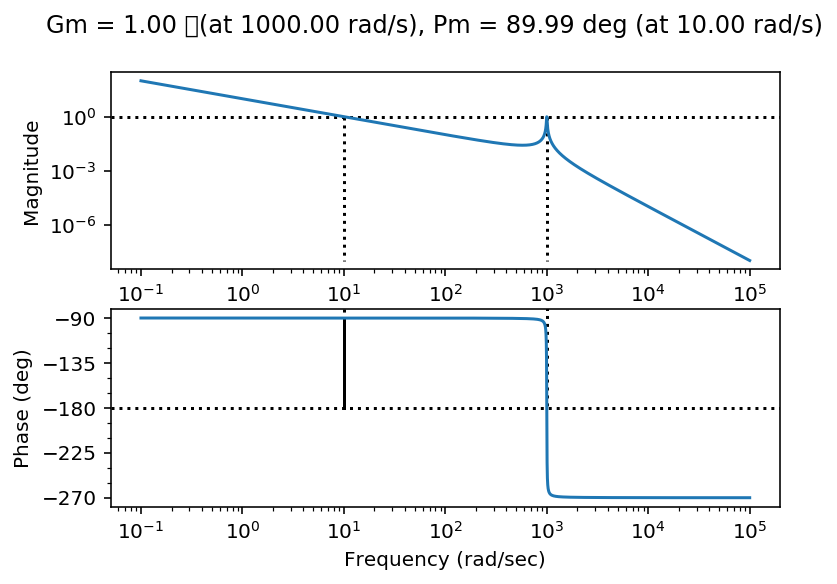

In [58]:
bode_plot(RR,omega=np.arange(0.01*ω_c,100*ω_n,1),margins=True);

The Gain-margin is too low due to the sharp resonance at 1000 rad/s.

In [59]:
# Put a second order low-pass filter before the resonance
ζ_lpf = np.sqrt(2)/2; #0.7 is a good starting point for ζ_lpf 
ω_lpf = 10*ω_c; #
lpf = 1/((s/ω_lpf)**2 + 2*(ζ_lpf)/(ω_lpf)*s + 1)
lpf


        1e+04
---------------------
s^2 + 141.4 s + 1e+04

In [60]:
ctrl = lpf*Ki/s
ctrl


        9.999e+09
-------------------------
s^3 + 141.4 s^2 + 1e+04 s

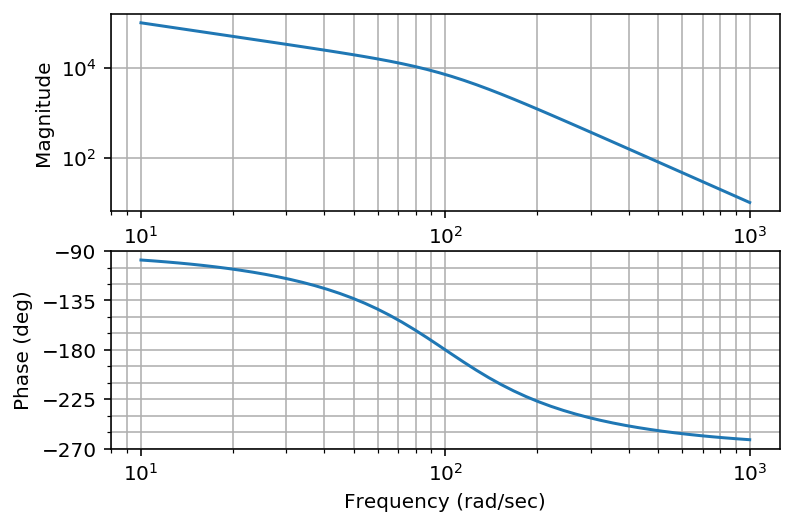

In [61]:
bode_plot(ctrl);

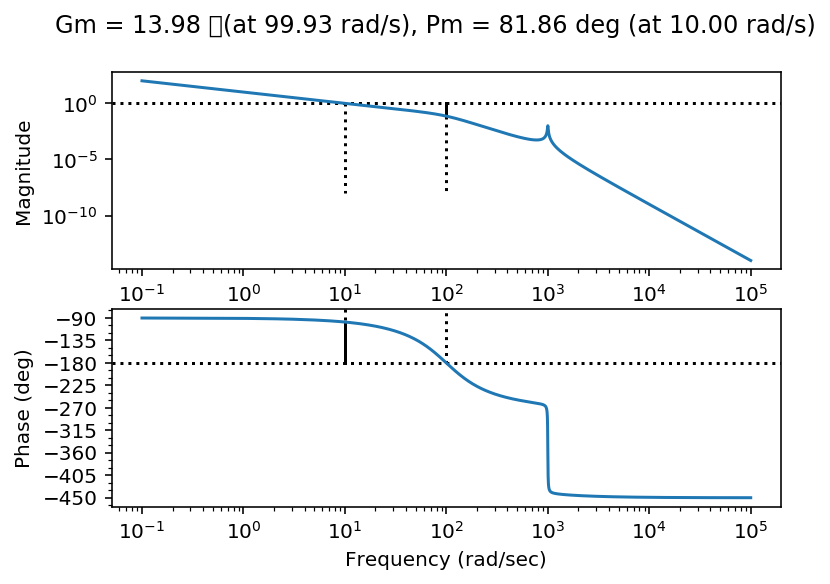

In [62]:
RR = ctrl*plant
bode_plot(RR,omega=np.arange(0.01*ω_c,100*ω_n,1),margins=True);

Now we have good phase and gain margin!

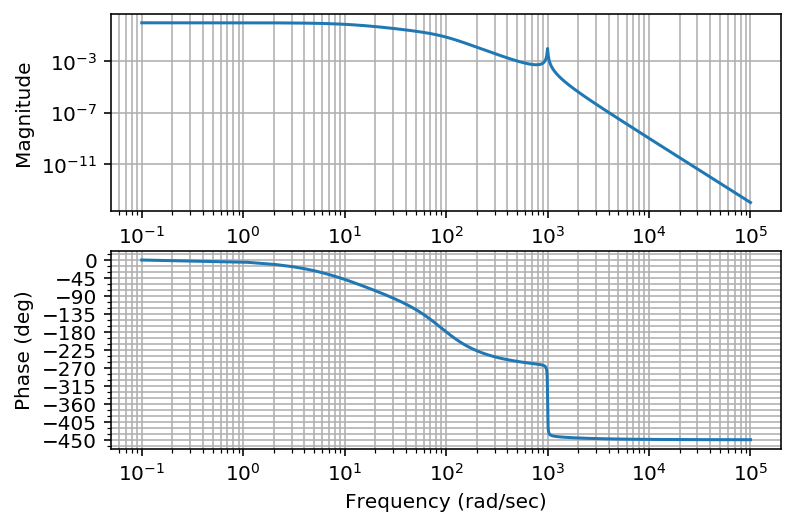

In [63]:
#Closed loop performance
CL = feedback(RR,1);
bode_plot(CL,omega=np.arange(0.01*ω_c,100*ω_n,1));

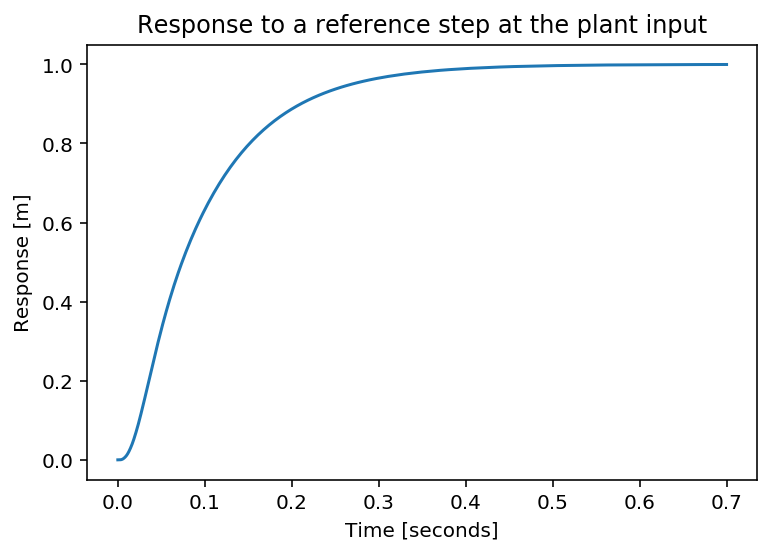

In [64]:
t = np.arange(0,700/ω_n,0.0001)
t,y = step_response(CL,t);
plt.plot(t,y)
plt.title('Response to a reference step at the plant input')
plt.ylabel('Response [m]')
plt.xlabel('Time [seconds]');